# TA210715A46
##Summary

This is an attempt at reducing the coupling by changing the spacing of the fingers pairs on the qubit IDT, pushing them to a higher frequency.

|Qubit|      |
|-----|------|
|Finger type| double finger|
| number of finger pairs $Np$ | 9 |
| overlap length $W$| 25 $\mu$m|
| finger width, $a$  | 80 nm |
|DC Junction Resistances | 8.93 k$\Omega$, 9.35 k$\Omega$|
|metalization ratio | 50%|


|Talking/Listening IDTs|    |
|------------------|----------|
|Finger type | double finger |
|NUmber of finger pairs | 36 |
|overlap length | 25 um 
| finger width | 96 nm | 
|metalization ratio | 50%|
|Capacitance | 518 fF |
| Center frequency | 4.54 GHz |

|Calculated values qubit| Value   | Expression|
|-----------------|-------|
|Center frequency| 5.45 GHz | $v/(8a)$|
|Gap $\Delta(0)$    | 200e-6 eV | $1.764 k_B T_c$| 
| Normal resistance $R_n $| 9.14 kOhms | mean(DC junction resistances)|
|Critical current, $I_c$ | 35 nA| $\dfrac{\pi \Delta(0)}{2e}$   Ambegaokar-Baratoff formula|
| Ej_max | 0.82 K, 17 GHz| $\dfrac{\hbar I_c}{2e R_n}$ |
|Capacitance from fingers Cq | 130 fF | ${\sqrt{2} W N_{p} \epsilon_\infty}$ | 
| $E_c$ |  7.2 mK, 150 MHz | $\dfrac{e^2}{2 C}$|
|Ejmax/Ec | 115 | Ejmax/Ec |
|Estimated max frequency of qubit | 4.37 GHz |


##Fundamental definitions and calculate values

In [2]:
%matplotlib inline
from matplotlib.pyplot import plot, pcolormesh, legend, title, xlabel, ylabel, show, colorbar, xlim, ylim
from scipy.constants import e, k, h, hbar, epsilon_0 as eps0, pi
from numpy import (sqrt, float64, shape, reshape, linspace, log10, absolute, cos, mean, transpose, amax, amin,
                   array, squeeze)
from h5py import File

def dB(x):
    return 20*log10(absolute(x))

#Table values:
W=25.0e-6
Npq=9
aq=80.0e-9

v=3488.0 #Literature value for LiNb YZ
epsinf=46.0*eps0 #Literature value for LiNb YZ

Tc=1.32 #critical temperature of aluminum
Delta=200.0e-6*e
Rn=(8.93e3+9.35e3)/2.0

#Calculated values
Ic=pi*Delta/(2.0*e)/Rn #Ambegaokar Baratoff formula
Ejmax=hbar*Ic/(2.0*e)

Cq=sqrt(2.0)*W*Npq*epsinf #Morgan
Ec=e**2/(2.0*Cq)

def flux_rescale(yoko):
    return (yoko-0.07)*0.198

def flux_parabola(flux_over_flux0):
    Ej = Ejmax*absolute(cos(pi*flux_over_flux0))
    E0 =  sqrt(8.0*Ej*Ec)*0.5 - Ec/4.0
    E1 =  sqrt(8.0*Ej*Ec)*1.5 - (Ec/12.0)*(6.0+6.0+3.0)
    return (E1-E0)/h

def detuning(flux_over_flux0):
    return 2.0*pi*(f0 - flux_parabola(flux_over_flux0))

def lorentzian(f, f0, P_in, g):
    g=2.0*pi*g/2.0
    N_in=P_in/(h*f0)
    d_omega=2.0*pi*(f0-f)
    S22=[]
    for N_idx, N in enumerate(N_in):
        S22.append((1.0+1j*d_omega/g)/(1.0 + d_omega**2/g**2 + 2.0*N/g))
    return squeeze(array(S22))

# Qubit reflection, for an incoming N_in phonons per second *at the qubit*
def  r_qubit(d_omega, P_in):
    N_in=P_in/hf0
    G = Gamma_tot
    g = gamma_10
    P22=[]
    for N_idx, N in enumerate(N_in):
        P22.append(-(G/(2.0*g))*(1.0+1j*d_omega/g)/(1.0 + d_omega**2/g**2 + 2.0*N/g))
    return squeeze(array(P22))


In [3]:
if 1: #Double check values
    print "Fundamental constants:"
    print "pi={}".format(pi)
    print "e={}".format(e)
    print "k={}".format(k)
    print "h={}".format(h)
    print "hbar={}".format(hbar)
    print "eps0={}".format(eps0)
    print 
    print "Material constants (Lithium Niobate YZ):"
    print "v={}".format(v)
    print "epsinf={}".format(epsinf)
    print 
    print "Sample constants:"
    print "W={} m".format(W)
    print "Npq={}".format(Npq)
    print "aq={}".format(aq)
    print "Rn={}".format(Rn)
    print 
    
if 1: #print calculated values
    print "Calculated values:"
    print "check gap of aluminum, Delta={}".format(1.764*k*Tc/e)
    print "Critical current, Ic={}".format(Ic) 
    print "Ejmax={0} K= {1} Hz".format(Ejmax/k, Ejmax/h)
    print "Qubit capacitance = {} F".format(Cq)
    print "Ec = {0} K = {1} Hz".format(Ec/k, Ec/h)
    print "Ejmax/Ec={}".format(Ejmax/Ec)
    print "fq_max=sqrt(8*Ejmax*Ec)={} Hz".format(sqrt(8.0*Ejmax*Ec)/h)
    print "fq_max_full={} Hz".format(flux_parabola(0.0))
    print
    print "Qubit center frequency = {} Hz".format(v/(8*aq))
    

Fundamental constants:
pi=3.14159265359
e=1.602176565e-19
k=1.3806488e-23
h=6.62606957e-34
hbar=1.05457172534e-34
eps0=8.85418781762e-12

Material constants (Lithium Niobate YZ):
v=3488.0
epsinf=4.07292639611e-10

Sample constants:
W=2.5e-05 m
Npq=9
aq=8e-08
Rn=9140.0

Calculated values:
check gap of aluminum, Delta=0.000200652861117
Critical current, Ic=3.43719108708e-08
Ejmax=0.819325005475 K= 17071962098.6 Hz
Qubit capacitance = 1.29599724328e-13 F
Ec = 0.00717304337314 K = 149461964.153 Hz
Ejmax/Ec=114.222787017
fq_max=sqrt(8*Ejmax*Ec)=4518060634.57 Hz
fq_max_full=4368598670.42 Hz

Qubit center frequency = 5450000000.0 Hz


#Data

(201, 201, 11)
4.0


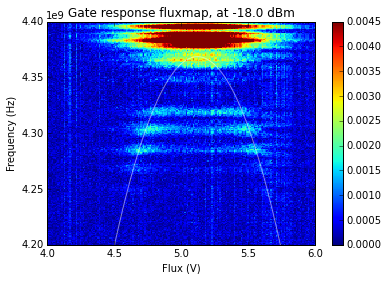

4285000000.0


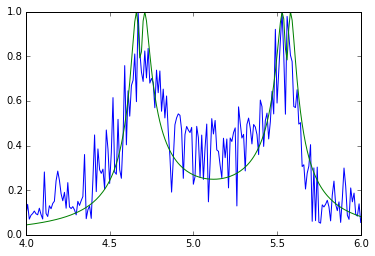

In [19]:
file_path="/Users/thomasaref/Dropbox/Current stuff/Logbook/TA210715A46_cooldown1/TA46_refll_fluxpowswp_4p2GHz4pGHz.hdf5"

with File(file_path, 'r') as f:
    #print f["Traces"].keys()
    Magvec=f["Traces"]["Rohde&Schwarz Network Analyzer - S12"]
    data=f["Data"]["Data"]
    fstart=f["Traces"]['Rohde&Schwarz Network Analyzer - S12_t0dt'][0][0]
    fstep=f["Traces"]['Rohde&Schwarz Network Analyzer - S12_t0dt'][0][1]
    sm=shape(Magvec)[0]
    sy=shape(data)
    s=(sm, sy[0], sy[2]) 
    Magcom=Magvec[:,0,:]+1j*Magvec[:,1,:]
    Magcom=reshape(Magcom, s, order="F")

    yoko=data[:, 0, 0]
    pwr= data[0, 1, :]
    yoko=yoko.astype(float64)
    freq=linspace(fstart, fstart+fstep*(sm-1), sm)

powind=4
print shape(Magcom)
print yoko[200]

Magabs=absolute(Magcom[:, :, powind]-mean(Magcom[:,190:,powind], axis=1, keepdims=True))

#pcolormesh(Magabs, vmin=0.0, vmax=0.0045 )
#show()

if 1:
    pcolormesh(yoko, freq, Magabs, vmin=0.0, vmax=0.0045 )
    plot(yoko, flux_parabola(flux_rescale(yoko)), "w", alpha=0.5)
    ylim(amin(freq), amax(freq))
    xlabel("Flux (V)")
    ylabel("Frequency (Hz)")
    title("Gate response fluxmap, at {} dBm".format(-87*0-20*0+pwr[powind]))
    colorbar()
    show()
if 1:
    freqind=85
    print freq[freqind]
    plot(yoko, transpose(Magabs[freqind, :]/amax(Magabs[freqind,:])))
    reflec=absolute(lorentzian(flux_parabola(flux_rescale(yoko)), freq[freqind], array([2.0e-16]), 10.0e6))
    plot(yoko, reflec/amax(reflec))
    #plot(amax(Magabs[:, :], axis=1)-amin(Magabs, axis=1))
    #xlim(100, 130)
    show()


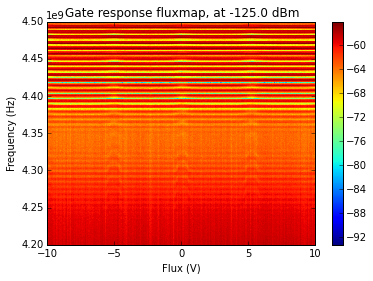

In [5]:
file_path="/Users/thomasaref/Dropbox/Current stuff/Logbook/TA210715A46_cooldown1/Data_1006/TA46_gate_flux_swp_4p2t4p5GHz.hdf5"

with File(file_path, 'r') as f:
    #print f["Traces"].keys()
    Magvec=f["Traces"]["Rohde&Schwarz Network Analyzer - S12"]
    data=f["Data"]["Data"]
    fstart=f["Traces"]['Rohde&Schwarz Network Analyzer - S12_t0dt'][0][0]
    fstep=f["Traces"]['Rohde&Schwarz Network Analyzer - S12_t0dt'][0][1]
    sm=shape(Magvec)[0]
    sy=shape(data)
    s=(sm, sy[0], sy[2]) 
    Magcom=Magvec[:,0,:]+1j*Magvec[:,1,:]
    Magcom=reshape(Magcom, s, order="F")

    pwr=data[:, 0, 0]
    yoko= data[0, 1, :]
    yoko=yoko.astype(float64)
    freq=linspace(fstart, fstart+fstep*(sm-1), sm)

powind=4

if 1:
    pcolormesh(yoko, freq, dB(Magcom[:, powind, :]))
    xlabel("Flux (V)")
    ylabel("Frequency (Hz)")
    title("Gate response fluxmap, at {} dBm".format(-87-20+pwr[powind]))
    colorbar()
    show()
